In [8]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier 

In [9]:
# function to classify and display the results 
def runClassifer(classifier, X_train, y_train, y_test):
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        print("Accuracy:",accuracy_score(y_test, y_pred))
        print("Confusion matrix: \n", confusion_matrix(y_test, y_pred))
        print(classification_report(y_test, y_pred))        

In [10]:
# Set the preferences
pd.set_option('display.max_columns',100) 
pd.set_option('display.max_colwidth', 100)

In [11]:
# Read the data from the file
Data = pd.read_csv('kidneyChronic.csv')

In [12]:
# Data Pre Processing
# Steps followed
# 1. Replace all ? with np.nan
# 2. Use SimpleImputer to update missing values with mean for numeric attributes
#    and most frequent value for nominal variables
# 3. Encode the labels for the nominal attribute values
# 4. Pick one of the attributes among the highly correlated attributes
# 4. Use StandardScaler to scale and transform the data  

In [13]:
# Replace missing values with NaN
Data.replace(['?', '?\t', '\t?'], np.nan, inplace=True)

# Columns for the numeric and nominal attributes
numerical_columns = ['age', 'bp',  'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc'] # 11 columns
nominal_columns = ['sg','al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad','appet', 'pe', 'ane', 'class']  # 14 columns

# Fill the missing values with mean and most frequent value for the numeric and nominal
# attributes
imp_nominal = SimpleImputer(strategy="most_frequent")
imp_numeric = SimpleImputer(missing_values=np.nan, strategy='mean')
Data[nominal_columns] = imp_nominal.fit_transform(Data[nominal_columns])
Data[numerical_columns] = imp_numeric.fit_transform(Data[numerical_columns])

In [14]:
# Encode the labels for the nominal attributes
labelencoder = LabelEncoder()
Data[nominal_columns] = Data[nominal_columns].apply(labelencoder.fit_transform)
Data = Data.astype(float)

Heatmap for correlation of the attributes:


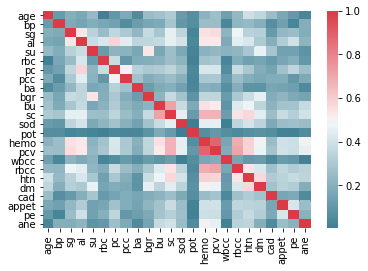

In [15]:
# Check if any of the attributes are corelated using the the heatmap
corr = Data.iloc[:, 0:-1].astype(float).corr(method='spearman').abs()
print("Heatmap for correlation of the attributes:")
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))
plt.show()

In [16]:
# Select upper triangle of correlation matrix
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
Data = Data.drop(columns=to_drop)

In [17]:
# Divide X and y based on the features and class column/attribute
X = Data.iloc[:, 0:-1]
y = Data.iloc[:, -1]

# Split the training and test data set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=2)

In [18]:
# Scale the values using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Histogram plots for the attributes:


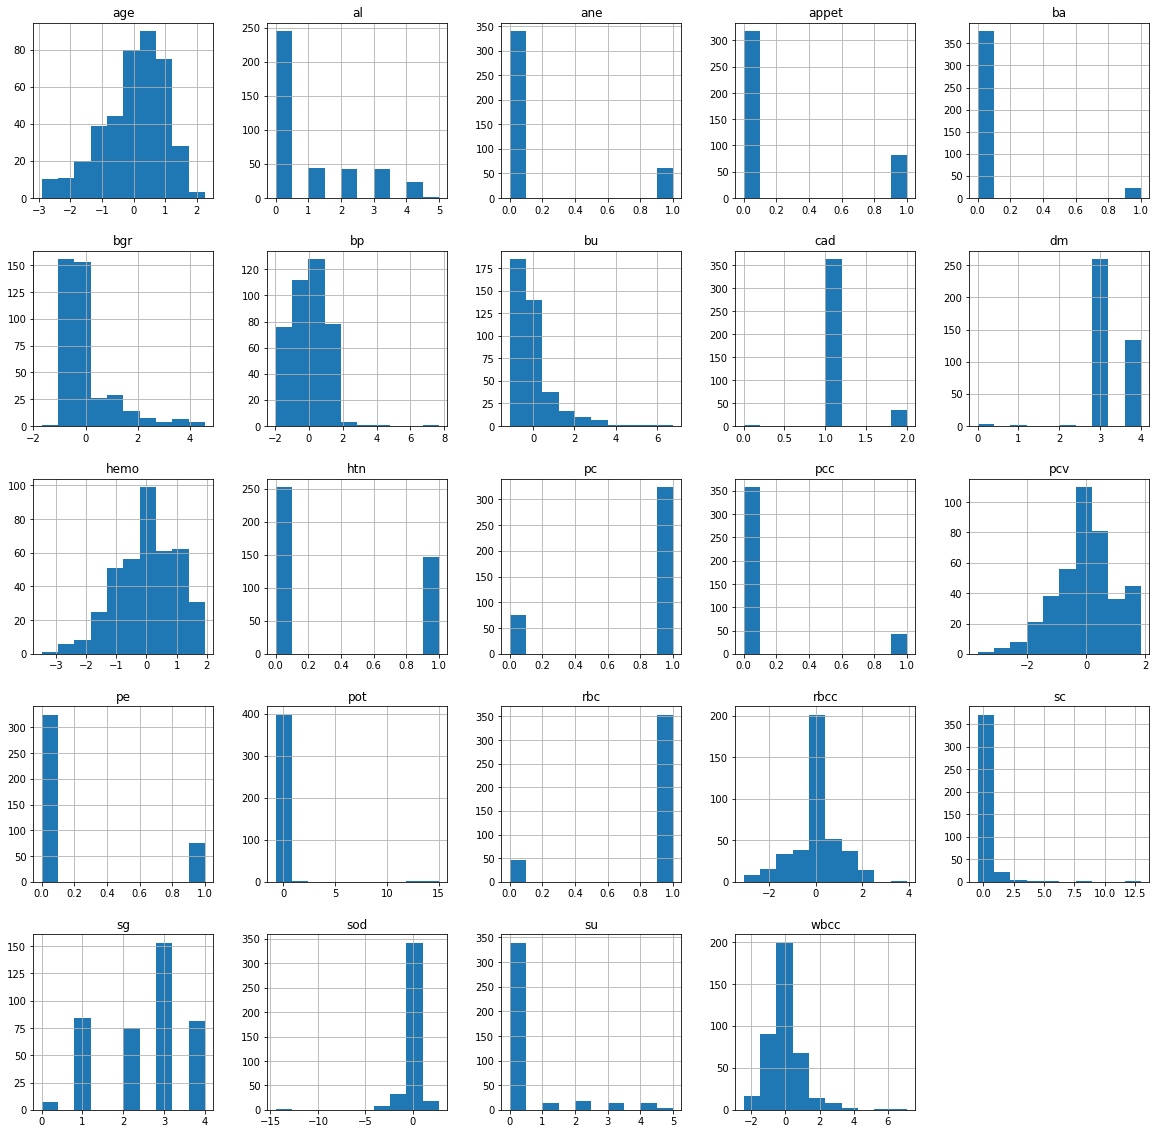

In [27]:
# Plot the histogram for the attribute values
print("Histogram plots for the attributes:")
hist = X.hist(figsize=[20,20])
plt.show()

In [25]:
print("Statistics and box plot for the Numerical attributes:")
Data[numerical_columns] = scaler.fit_transform(Data[numerical_columns])
Data.describe()


Statistics and box plot for the Numerical attributes:


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
count,4.000000e+02,4.000000e+02,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,-7.827072e-17,-8.817946e-16,2.542500,0.90000,0.395000,0.882500,0.810000,0.105000,0.055000,1.797174e-17,1.526557e-16,-1.978973e-16,-8.562595e-17,-3.552714e-17,-3.552714e-17,-2.303713e-16,6.661338e-18,7.549517e-17,0.367500,3.300000,1.080000,0.205000,0.190000,0.150000,0.375000
std,1.001252e+00,1.001252e+00,1.086806,1.31313,1.040038,0.322418,0.392792,0.306937,0.228266,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,0.482728,0.579517,0.289499,0.404207,0.392792,0.357519,0.484729
min,-2.918730e+00,-1.966580e+00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.687482e+00,-1.136142e+00,-4.763339e-01,-1.447103e+01,-7.553446e-01,-3.474833e+00,-3.670915e+00,-2.462684e+00,-3.106814e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-5.593680e-01,-4.806345e-01,2.000000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,-6.297642e-01,-6.181044e-01,-3.872147e-01,-2.750810e-01,-2.227225e-01,-6.087632e-01,-5.999959e-01,-5.678913e-01,-2.471631e-01,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.484407e-01,1.311692e-01,3.000000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,-2.950433e-01,-2.727461e-01,-2.980955e-01,0.000000e+00,6.661338e-17,0.000000e+00,-1.776357e-16,-1.243450e-16,-7.740664e-16,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,7.382812e-01,2.623384e-01,3.000000,2.00000,0.000000,1.000000,1.000000,0.000000,0.000000,2.628875e-02,8.784855e-02,-3.552714e-17,3.776065e-01,6.134259e-02,7.735858e-01,6.283716e-01,3.943858e-01,4.677496e-01,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,2.271867e+00,7.692067e+00,4.000000,5.00000,5.000000,1.000000,1.000000,1.000000,1.000000,4.578493e+00,6.776626e+00,1.299849e+01,2.770794e+00,1.504578e+01,1.943975e+00,1.856739e+00,7.140246e+00,3.923161e+00,1.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.000000


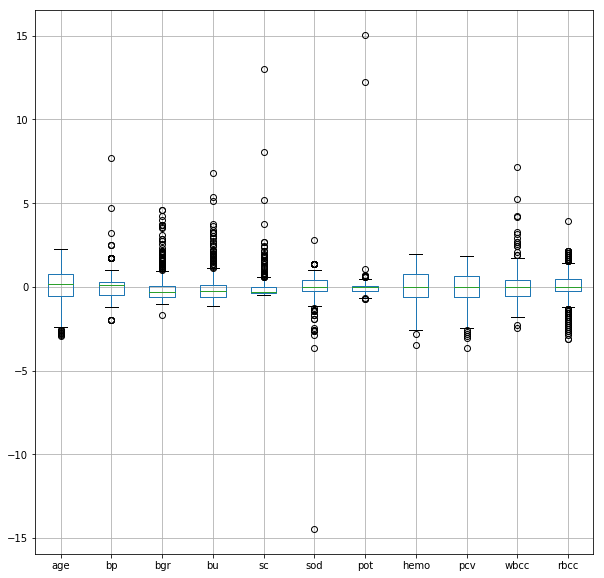

In [26]:
boxplot = Data[numerical_columns].astype(float).boxplot(figsize=[10,10])
plt.show()

In [21]:
# Create Decision Tree classifer object
dtc = DecisionTreeClassifier(random_state=2)
print("Classifier used - Decision Tree Classifier :")
runClassifer(dtc,X_train,y_train,y_test)

Classifier used - Decision Tree Classifier :
Accuracy: 0.9666666666666667
Confusion matrix: 
 [[75  3]
 [ 1 41]]
              precision    recall  f1-score   support

         0.0       0.99      0.96      0.97        78
         1.0       0.93      0.98      0.95        42

   micro avg       0.97      0.97      0.97       120
   macro avg       0.96      0.97      0.96       120
weighted avg       0.97      0.97      0.97       120



In [22]:
# Create Gaussian Naive Bayes classifer object
gnb = GaussianNB()
print("Classifier used - Gaussian Naive Bayes :")
runClassifer(gnb,X_train,y_train,y_test)

Classifier used - Gaussian Naive Bayes :
Accuracy: 0.9666666666666667
Confusion matrix: 
 [[74  4]
 [ 0 42]]
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97        78
         1.0       0.91      1.00      0.95        42

   micro avg       0.97      0.97      0.97       120
   macro avg       0.96      0.97      0.96       120
weighted avg       0.97      0.97      0.97       120



In [23]:
# Create Gradient Boosting classifer object
gbc = GradientBoostingClassifier()
print("Classifier used - Gradient Boosting :")
runClassifer(gbc,X_train,y_train,y_test)

Classifier used - Gradient Boosting :
Accuracy: 0.9916666666666667
Confusion matrix: 
 [[77  1]
 [ 0 42]]
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99        78
         1.0       0.98      1.00      0.99        42

   micro avg       0.99      0.99      0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



In [24]:
# Create SVM classifer object
svm = SVC(kernel='rbf',random_state=2)
print("Classifier used - SVM :")
runClassifer(svm,X_train,y_train,y_test)

Classifier used - SVM :
Accuracy: 1.0
Confusion matrix: 
 [[78  0]
 [ 0 42]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        78
         1.0       1.00      1.00      1.00        42

   micro avg       1.00      1.00      1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

